<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Blood pressure as function of age</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.3</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this example, a very simple linear regression model for predicting systolic blood pressure based on the age of a person will be built. For this reason, we will use a small dataset containing 30 observations. Each observation consists of the measured blood pressure of the individual as output (dependent variable) and the age of the person as input (independent variable). The aim is to find the linear relation between the input and output variables and be able to predict the average blood pressure based on the age of a person. <br>
**Note**: *The original dataset can be found at http://people.sc.fsu.edu/~jburkardt/datasets/regression/x03.txt. It was converted to csv file using LibreOffice Calc and removing both the top description part, as well as the A0 column (being 1 for every entry).*

### Table of contents
1. [Reading the data](#ReadingData)
2. [Scatter plot of the observations](#ScatterPlot)
3. [Calculate the parameters and plot the estimated regression line](#PlotEstRegrLine)
4. [Make predictions](#Predict)
5. [Calculate RSS and R-squared](#CalcRSSR2)

## 1. Reading the data <a name="ReadingData"></a>

As a first step, we import the NumPy and Pandas libraries. Numpy is used for array manipulations (vectors and matrices) while pandas is used for database manipulations. In this notebook, pandas is used to read the csv file into a dataframe and then convert it to input and output vectors (NumPy arrays). All the formulas derived in the book have compact matrix forms which can be directly converted to Python/NumPy code. We also import the matplotlib library for making graphics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

Read the BloodpressureAge.csv file into a pandas dataframe which contains the measured systolic blood pressure of 30 people with different ages.

In [2]:
data = pd.read_csv(os.path.join('data','BloodpressureAge.csv'))

We will print out the dataset to have the first glimpse of it. The dataset contains three columns: Index, Age, and Systolic blood pressure. There are 30 unordered data points (called observations). <br>
**Note**: *Indexing of pandas dataframe, as well as NumPy ndarrays, starts from zero and not from one. The Index column shown below is not equivalent to the pandas indexing.*

In [3]:
print("Dataset of the systolic blood pressure vs. age:")
print("===============================================\n",data.to_string(index=False))

Dataset of the systolic blood pressure vs. age:
  Index  Age  Systolic blood pressure
     1   39                      144
     2   47                      220
     3   45                      138
     4   47                      145
     5   65                      162
     6   46                      142
     7   67                      170
     8   42                      124
     9   67                      158
    10   56                      154
    11   64                      162
    12   56                      150
    13   59                      140
    14   34                      110
    15   42                      128
    16   48                      130
    17   45                      135
    18   17                      114
    19   20                      116
    20   19                      124
    21   36                      136
    22   50                      142
    23   39                      120
    24   21                      120
    25   44               

Extract the input and output values from the pandas dataframe into vectors $\mathbf{x}$ and $\mathbf{y}$. Also, extract the number of observations $N$ available in the dataset.

**Note**: * To follow the mathematical notations of the book the following naming convention is applied for variables in the code: scalar variables will use lower case (except for matrix dimensions, like the number of observations $N$ ), vector variables will use lower case followed by an underscore (no bold letters can be applied, so the underscore represents the vector notation), and matrix variables will use upper case.* 

In [4]:
x_=np.array(data["Age"])[:,np.newaxis]
y_=np.array(data["Systolic blood pressure"])[:,np.newaxis]
N,_=data.shape
print("Number of observations in the data set:",N)

Number of observations in the data set: 30


## 2. Scatter plot of the observations <a name="ScatterPlot"></a>

Make a scatterplot of the observations from the dataset to have a grasp about your data. If you want to apply linear regression, an initial visual check is always useful to see the trend in your data.

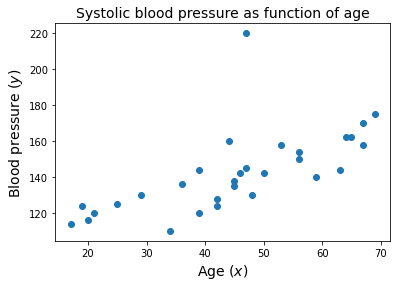

In [5]:
plt.scatter(x_,y_)
plt.xlabel("Age ($x$)",fontsize=14)
plt.ylabel("Blood pressure ($y$)",fontsize=14)
plt.title("Systolic blood pressure as function of age",fontsize=14)
plt.show()

As can be observed from the scatter plot, there is some linear trend between the age of a person and his/her blood pressure.

## 3. Calculate the parameters and plot the estimated regression line <a name="PlotEstRegrLine"></a>

Calculate the slope and the intercept of the estimated regression line using the formulas derived in the book:
1. $w=\frac{\mathrm{\Sigma} (\mathbf{y}-\overline y)(\mathbf{x}-\overline x)}{\mathrm{\Sigma} (\mathbf{x}-\overline x)^2}$
2. $b=\overline y - w\cdot \overline x$

**Note**: *Conversion from the mathematical notation to Python code is straightforward when using NumPy operators and methods.*

In [6]:
w=np.sum((y_-y_.mean())*(x_-x_.mean()))/np.sum((x_-x_.mean())**2)   # (1)
b=y_.mean()-w*x_.mean()                                             # (2)
print("Intercept of the estimated regression line: b =",b)
print("Slope of the estimated regression line: w =",w)

Intercept of the estimated regression line: b = 98.71471813821842
Slope of the estimated regression line: w = 0.9708703514427236


The slope of the estimated regression line expresses how many units in blood pressure increase we should expect on average if a person gets one year older. This is less than one unit, but comparing a 20-year-old person with a 70-year-old person the blood pressure difference is 48.5 units on average. We might also state that, based on the value of the intercept, the average blood pressure of an infant (for x=0) would be 98.7 units. Although this seems reasonable we might see in the following exercises that we should be cautious by making assumptions based on the intercept! <br>
Let's, define the prediction function $\hat y=f(x)$ which can be used for making predictions on the systolic blood pressure of a person with an age not contained in the dataset. <br>
**Note**: *The function can take as an argument either a scalar value (returning a scalar value) or a vector (returning a vector).*

In [7]:
def f(x_):
    yhat_=w*x_+b
    return yhat_

Let's, plot the so-called estimated regression line across the scatter plot of the observations. The residual (the error between the observed blood pressure and the predicted mean value) for the largest and smallest blood pressure is also drawn with narrow dashed lines.

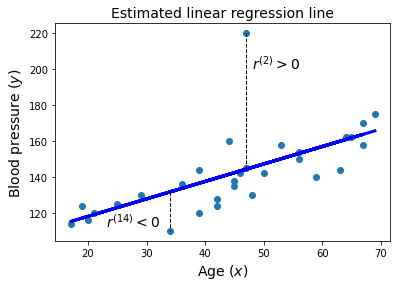

In [8]:
text1='$r^{('+str(y_.argmax()+1)+')}>0$'
text2='$r^{('+str(y_.argmin()+1)+')}<0$'
plt.scatter(x_,y_)
plt.xlabel("Age ($x$)",fontsize=14)
plt.ylabel("Blood pressure ($y$)",fontsize=14)
plt.title("Estimated linear regression line",fontsize=14)
plt.plot(x_,f(x_),'-b',lw=3)
plt.plot((x_[y_.argmax(),0],x_[y_.argmax(),0]),(f(x_[y_.argmax(),0]),y_.max()),'--k',lw=1)
plt.gcf().gca().annotate(text1, xy=(x_[y_.argmax(),0], np.max(y_)), xytext=(48, 200),fontsize=14)
plt.plot((x_[y_.argmin(),0],x_[y_.argmin(),0]),(f(x_[y_.argmin(),0]),y_.min()),'--k',lw=1)
plt.gcf().gca().annotate(text2, xy=(x_[y_.argmin(),0], np.min(y_)), xytext=(23, 112),fontsize=14)
plt.show()

From the figure above, it can be seen that the estimated regression line fits quite well with the observations from the data set.

## 4. Make predictions <a name="Predict"></a>

Now, that our predict function is ready, let's see our prediction for some ages not contained in the data set.

In [9]:
for age in [18,49,75]:
    print("Systolic blood pressure of %d year old person in average is = %f"%(age,f(age)))

Systolic blood pressure of 18 year old person in average is = 116.190384
Systolic blood pressure of 49 year old person in average is = 146.287365
Systolic blood pressure of 75 year old person in average is = 171.529994


We might think that our job is done. But that is not the case. First, we need to check how good is our prediction.<br>
**Note:** *In later exercises, we will also observe that some uncertainty is associated with our predictions.*

## 5. Calculate RSS and R-squared <a name="CalcRSSR2"></a>

Let's see what the numbers tell about our fitted model. For this reason, calculate the residual sum of squares:<br> $\mathrm{RSS}=\mathrm{\Sigma} (\mathbf{y}-f(\mathbf{x}))^2$

In [10]:
RSS=np.sum((y_-f(x_))**2)
print("Residual sum of squares: RSS =",RSS)

Residual sum of squares: RSS = 8393.443981445082


Then check if the sum of residuals is zero.

In [11]:
print("Sum of residuals:",np.sum(y_-f(x_)))

Sum of residuals: -1.8474111129762605e-13


Yes, it is zero (except for some rounding error). As we discussed in the book, the RSS is not a good indicator of our model as its value depends on the number of observations (leaving out an observation should decrease the RSS value except when the left-out observation lies exactly on the estimated regression line). We can divide the RSS by the number of observations to avoid that pitfall. But even the mean of the RSS value does not provide any useful information about how much error we should expect on average. Let's calculate the regression standard error (RSE) or standard error of the estimate. To have an unbiased estimate of the standard deviation of the population error, we should divide RSS by the number of degrees of freedom.

In [12]:
RSE=np.sqrt(RSS/(N-2))
print("Standard error of estimate: RSE =",RSE)

Standard error of estimate: RSE = 17.31374761512312


That means, when we predict the average systolic blood pressure corresponding to a given age, then the error made is 17 units on average. Let's calculate the R-squared value for the estimated regression line. First, we calculate the total sum of squares: <br> 
$\mathrm{SST}=\mathrm{\Sigma}(\mathbf{y}-\overline y)^2$

In [13]:
SST=np.sum((y_-y_.mean())**2)
R2=1-RSS/SST
print("R-squared value is: R2 =",R2)

R-squared value is: R2 = 0.43239473192759537


The R-squared value is quite low. It means that age only explains 43% of the change in the blood pressure. We will check in the upcoming exercise related to outlier how the R-squared value can be increased in this particular example. <br>
Let's check the correlation coefficient between the input and output: <br>
$r=\frac{\mathrm{\Sigma} (\mathbf{x}-\overline x)(\mathbf{y}-\overline y)}{\sqrt{\mathrm{\Sigma} (\mathbf{x}-\overline x)^2}\sqrt{\mathrm{\Sigma} (\mathbf{y}-\overline y)^2}}$

In [14]:
r=np.sum((x_-x_.mean())*(y_-y_.mean()))/(np.sqrt(np.sum((x_-x_.mean())**2))*np.sqrt(np.sum((y_-y_.mean())**2)))
print("Correlation coefficient: r =",r)

Correlation coefficient: r = 0.6575672831943475


For simple linear regressions, the R-squared is equal to the square of the correlation coefficient. Let's check with this example.

In [15]:
print("Square of correlation coefficient (should be equal to R-squared):", r*r)

Square of correlation coefficient (should be equal to R-squared): 0.43239473192759525


And indeed, the square of the correlation coefficient is equal to the R-squared value the latter also called the coefficient of determination. Most Machine learning courses stop here when discussing simple linear regression, but as we will see in the upcoming exercises more things need to be taken into account.

Finally, let's have a look at the summary table of the *statsmodels* library. We can use this for comparing the results obtained from other datasets.

In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
data=data.rename(index=str, columns={"Systolic blood pressure": "BloodPressure","Age":"Age"})
model = ols(formula = 'BloodPressure ~ Age', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     21.33
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           7.87e-05
Time:                        20:35:59   Log-Likelihood:                -127.08
No. Observations:                  30   AIC:                             258.2
Df Residuals:                      28   BIC:                             261.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.7147     10.000      9.871      0.0

This OLS summary is inserted here for later usage (for comparing with the results obtained with a different dataset in the lab exercise from Chapter 3).    

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).